# Visualize Alpine-3D downscalled meteorology

In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from palettable.colorbrewer.diverging import RdBu_11
from palettable.colorbrewer.sequential import *

In [8]:
# Load Alpine-3D
# path = "../../nc_storage/450.nc"
path = "../output/grids/a3d_grids_1980.nc"
ds = xr.open_dataset(path)

# Load Alpine-3D topography 
# dem = np.flipud(np.loadtxt("../input/surface-grids/dem.asc", skiprows=6))
dem = np.flipud(np.loadtxt("../input/surface-grids/dem.asc", skiprows=6))
dem = xr.DataArray(dem, coords=[ds['northing'], ds['easting']], dims=['northing', 'easting'])

In [11]:
# Trim grids
n_trim = 15
time_trim = 8627

ds = ds.isel(easting=slice(n_trim, -n_trim))
ds = ds.isel(northing=slice(n_trim, -n_trim))
ds = ds.isel(time=slice(0, time_trim))

dem = dem.isel(easting=slice(n_trim, -n_trim))
dem = dem.isel(northing=slice(n_trim, -n_trim))

# Organize data for plotting

In [12]:
# Get easting and northing
x_snowpack = ds['easting'] / 1000
y_snowpack = ds['northing'] / 1000

# Alpine-3D variable

# # Delta SWE
A3D_var = ds['swe'].isel(time=-1) - ds['swe'].isel(time=0); A3D_var *= 1000; colormap=YlGnBu_9.mpl_colormap

# # Drifting snow frequency 
# erosion = ds['ERODEDMASS'] > 0
# A3D_var = 100 * erosion.sum(dim='time') / len(ds['time']); colormap=Purples_9.mpl_colormap

# # Surface temperature
# A3D_var = ds['ts'].mean(dim='time') - 273.15; colormap=YlOrRd_9.mpl_colormap

# Precipitation
# A3D_var = ds['pr'].sum(dim='time'); colormap=YlGnBu_9.mpl_colormap

# Wind Speed
# A3D_var = ds['ws'].mean(dim='time'); colormap=PuBuGn_9.mpl_colormap

# # Bulk snow density
# A3D_var = ds['snow_density'].isel(time=-1); colormap=PuBuGn_9.mpl_colormap

# Change in snow height
# snow_height = ds['swe'] * 1000 / ds['snow_density']
# A3D_var = snow_height.isel(time=-1) - snow_height.isel(time=0); colormap=RdBu_11.mpl_colormap


# Plot variable

<xarray.DataArray 'swe' ()>
array(336.83258, dtype=float32)


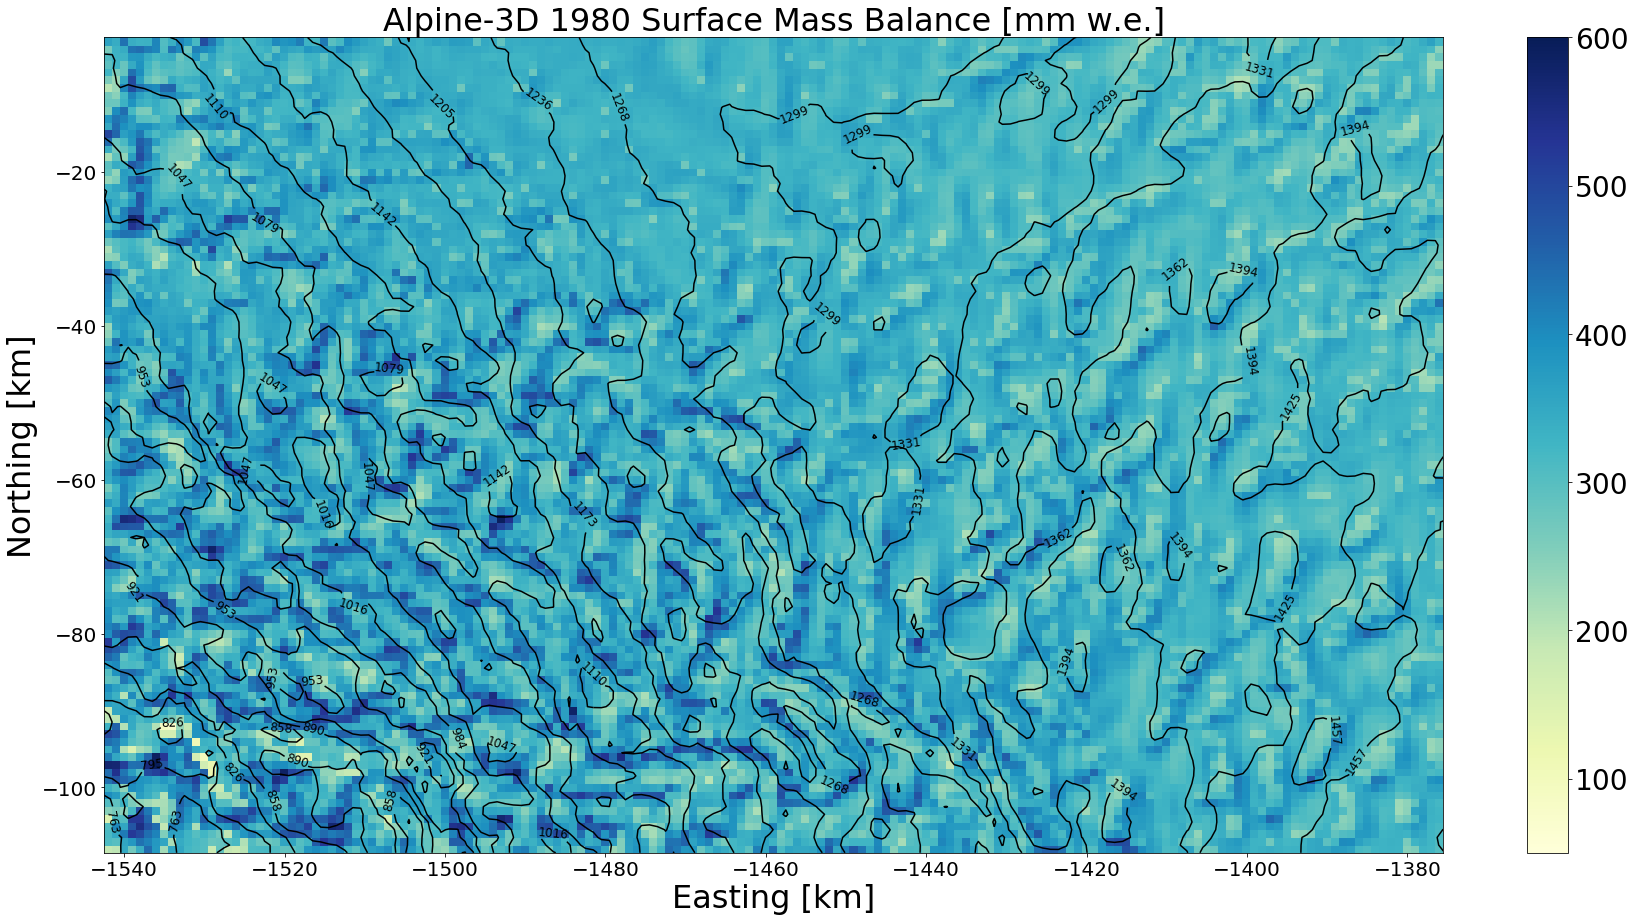

In [13]:
# Create figure
plt.figure(figsize=(30,15))

# DEM
# contour_levels = np.linspace(dem.min(), dem.max(), 25)
contour_levels = np.linspace(dem.min(), dem.max(), 25)
contour = plt.contour(x_snowpack.values, y_snowpack.values, dem, contour_levels, linestyles='solid', colors='black')
plt.clabel(contour, fontsize=12, fmt = '%.0f', inline = True)

# Alpine-3D variable
# plt.pcolor(x_snowpack.values, y_snowpack.values, A3D_var, cmap = colormap, vmin=-np.abs(A3D_var).max(), vmax=np.abs(A3D_var).max())
# plt.pcolor(x_snowpack.values, y_snowpack.values, A3D_var, cmap=colormap, vmin=A3D_var.min(), vmax=A3D_var.max())
# plt.pcolor(x_snowpack.values, y_snowpack.values, A3D_var, cmap=colormap, vmin=0, vmax=450)
plt.pcolor(x_snowpack.values, y_snowpack.values, A3D_var, cmap=colormap, vmin=50, vmax=600)
# plt.pcolor(x_snowpack.values, y_snowpack.values, A3D_var, cmap=colormap)
plt.title('Alpine-3D 1980 Surface Mass Balance [mm w.e.]', fontsize=32)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Easting [km]", fontsize=32)
plt.ylabel("Northing [km]", fontsize=32)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=28)
print(A3D_var.mean())
plt.savefig("A3D_meteorology.pdf", dpi=100)

# Plot a transect

In [14]:
# # Create figure
# n_row = 29
# print(A3D_var['northing'][n_row])
# fig, ax1 = plt.subplots(figsize=(20,7))

# # Plot wind speed
# color = 'tab:red'
# ax1.set_xlabel('Easting [km]', fontsize=24)
# ax1.set_ylabel('1980 Mean Wind Speed [m/s]', color=color, fontsize=24)
# ax1.plot(x_snowpack, A3D_var[n_row,:], color=color, linewidth=3)
# ax1.tick_params(axis='y', labelcolor=color, labelsize=20)
# ax1.tick_params(axis='x', labelsize=20)


# # Plot topography
# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# color = 'tab:blue'
# ax2.set_ylabel('Topography Gradient', color=color, fontsize=24)
# ax2.plot(x_snowpack, -np.gradient(dem[n_row,:]), color=color, linewidth=3)
# ax2.tick_params(axis='y', labelcolor=color, labelsize=20)

# # Settings
# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.grid()
# plt.savefig("A3D_transect.pdf", dpi=100)
# # plt.show()

-79.5


ValueError: x and y must have same first dimension, but have shapes (168,) and (1000,)

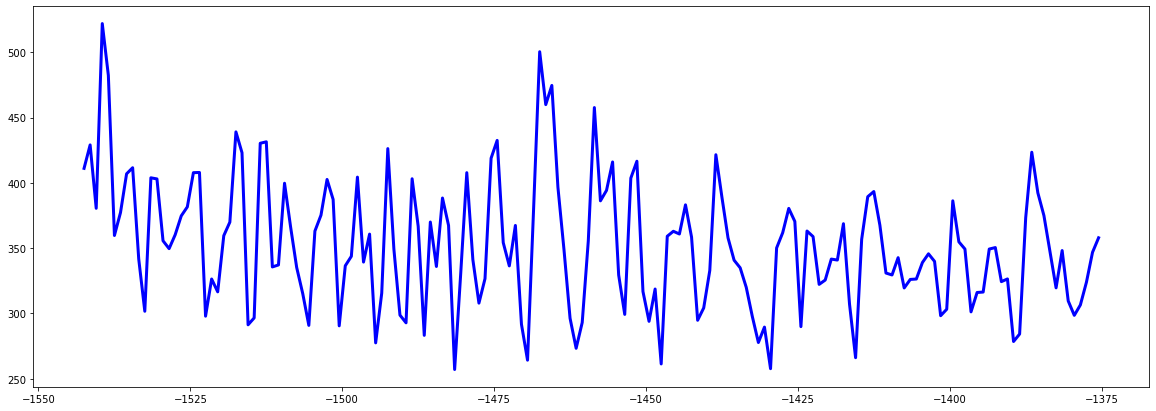

In [15]:
# Create figure
n_row = 29
easting = A3D_var['northing'][n_row].values / 1000
print(easting)

# Save base transect
if path == '../../nc_storage/450.nc':
    print("saving to base.txt")
    save_array = A3D_var[n_row,:].values
    np.savetxt("base.txt", save_array)

# Load saved array
base_transect = np.loadtxt("base.txt")

# Plot SMB
fig, ax1 = plt.subplots(figsize=(20,7))
plt.plot(x_snowpack, A3D_var[n_row,:], c='b', linewidth=3, label='New')
plt.plot(x_snowpack, base_transect, c='k', linewidth=3, label='Base')
plt.grid()
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Easting [km]", fontsize=20)
plt.title("1980 SMB [mm w.e.], Northing = " + str(easting) + " km", fontsize=20)
plt.savefig("A3D_transect.pdf", dpi=100)

# DEM comparison

In [19]:
# Load data sets
dem_high_res = np.flipud(np.loadtxt("../input/surface-grids/dem.asc", skiprows=6))
dem_low_res = np.flipud(np.loadtxt("../input/modified_surface_grids/dem.asc", skiprows=6))

# Define colorbar
# colormap=RdBu_11.mpl_colormap
colormap=YlGnBu_9.mpl_colormap

# Define colorbar limits
high_res_max = dem_high_res.max()
high_res_min = dem_high_res.min()
low_res_max = dem_low_res.max()
low_res_min = dem_low_res.min()

maxima = np.maximum(high_res_max, low_res_max)
minima = np.minimum(high_res_min, low_res_min)

# Plot DEM (High Resolution)

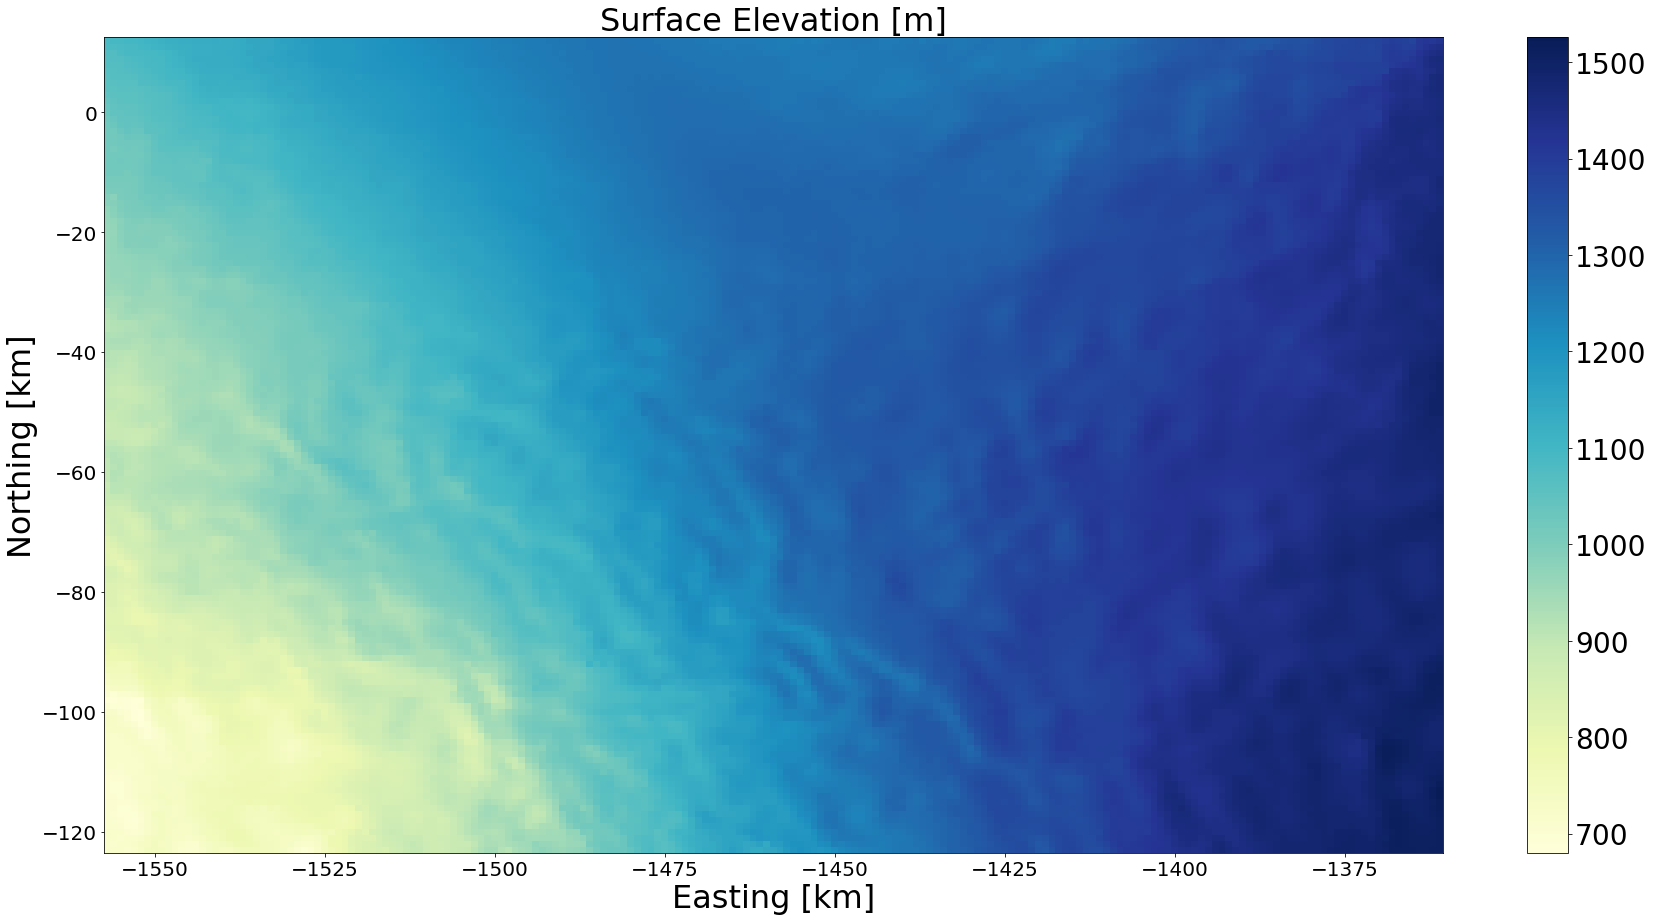

In [20]:
# Create figure
plt.figure(figsize=(30,15))
plt.pcolor(ds['easting']/1000, ds['northing']/1000, dem_high_res, cmap=colormap, vmin=minima, vmax=maxima)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=28)
plt.title('Surface Elevation [m]', fontsize=32)
plt.xlabel("Easting [km]", fontsize=32)
plt.ylabel("Northing [km]", fontsize=32)
plt.savefig("A3D_meteorology.pdf", dpi=100)

# Plot DEM (Lower Resolution)


In [15]:
# # Create figure
# plt.figure(figsize=(30,15))
# plt.pcolor(dem_low_res, cmap=colormap, vmin=minima, vmax=maxima)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=32)
# plt.title('Surface Elevation [m]', fontsize=24)
# plt.savefig("A3D_meteorology.pdf", dpi=100)

In [ ]:
ds.close()